Using spore viabilities painstakingly analysed by Andreas Tsouaris, I try first to see how many crosses of interest were already analysed by him, but then realize there are way too few, so all I can say is that spore viability ~ distance and hence use only distance for further cross selection criteria.

In [1]:
source("~/BrusselSprouts/scripts/functions.R")


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
library(readxl)
my_crosses=read_xlsx("~/data/trd/Crosses.xlsx", sheet=2)[,c("Cross ID","Short name 1", "Short name 2", "Colonies in pool")]

New names:
* `Is in Stock` -> `Is in Stock...4`
* `Is in Stock` -> `Is in Stock...6`


In [3]:
data=fread("~/data/trd/spore_viability_forJan.csv", data.table=FALSE)
data=tidyr::separate(data,CrossFull,c("ID1","ID2"),sep=" x ")
head(data)

,V1,Cross,Via,ID1,ID2
,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,A1,0.8355263,YJS7200,YJS7105
2,2,B1,0.9262295,YJS7200,YJS7109
3,3,B2,0.8298611,YJS7205,YJS7109
4,4,C1,0.7415966,YJS7200,YJS7111
5,5,C2,0.6903670,YJS7205,YJS7111
6,6,C3,0.8342105,YJS7209,YJS7111


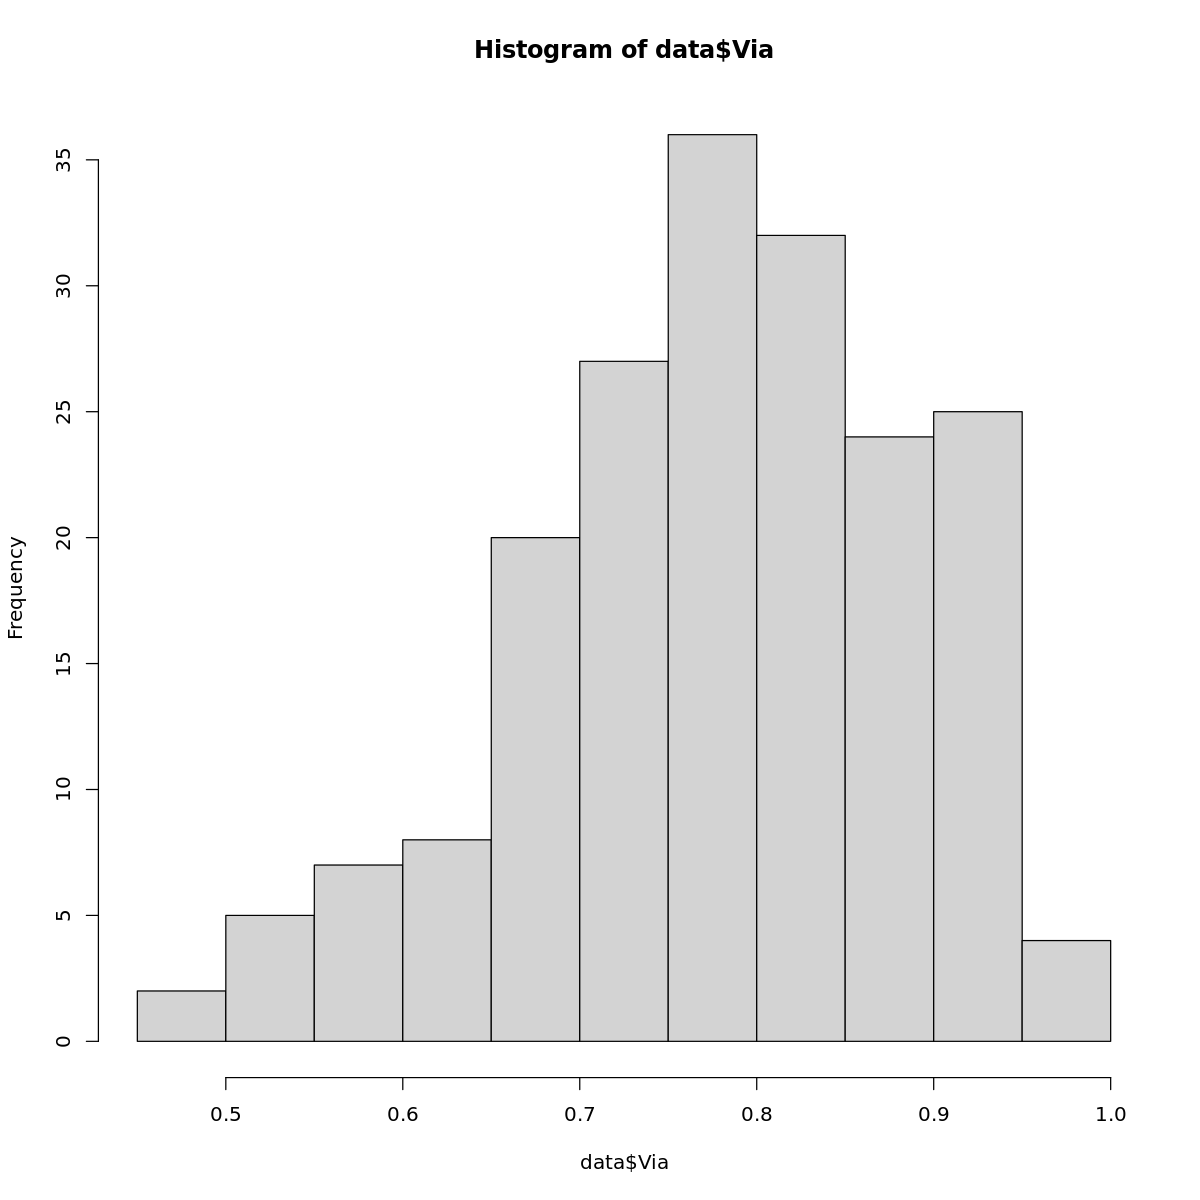

In [4]:
hist(data$Via)

In [5]:
Overview=readxl::read_xlsx("/home/jnrunge/1002_strains_total_dataset.xlsx", sheet = "final_1002_site")
Matrix1=readxl::read_xls("/home/jnrunge/Yeast_Collection_YJS_headers.xls", sheet = "MATalpha ClonNAT Matrix reloade")
Matrix2=readxl::read_xls("/home/jnrunge/Yeast_Collection_YJS_headers.xls", sheet = "MATa KanMX Matrix reloaded")

In [6]:
summary(data$ID2 %in% Overview$`Strain Name`)

   Mode   FALSE 
logical     190 

In [7]:
summary(data$ID1 %in% c(Matrix1$Lab_name,Matrix2$Lab_name))
summary(data$ID2 %in% c(Matrix1$Lab_name,Matrix2$Lab_name))

   Mode    TRUE 
logical     190 

   Mode    TRUE 
logical     190 

In [8]:
Matrix1$Syst_name[!endsWith(Matrix1$Syst_name, "_b")]
Matrix2$Syst_name[!endsWith(Matrix2$Syst_name, "_a")]

samples1=str_replace(Matrix1$Syst_name, "_b$", "")
samples2=str_replace(str_replace(str_replace(Matrix2$Syst_name, "_a$", ""), "_b$", ""),fixed("_rho+"),"")

samples=samples2[samples2%in%samples1[samples1%in%samples2]]

summary(samples%in%Overview$`Strain Name`)
Overview$`Standard ID`[Overview$`Strain Name` %in% samples]

[1] "FY5"

[1] "HN16_b"   "FY4_rho+"

   Mode   FALSE    TRUE 
logical      12      58 

[1] "BAK" "ABL" "ABP" "BHN" "ACP" "AAM" "AAR" "BEF" "BFQ" "BFR" "AKQ" "AKS"
[13] "AKV" "CCC" "CCD" "CCF" "CCG" "BID" "BKL" "BQC" "ABS" "AKI" "AMD" "BET"
[25] "BEV" "BFC" "BFD" "BFP" "BAN" "BAP" "AKH" "AKE" "CRB" "AMM" "ACT" "ACI"
[37] "ACK" "AAS" "ACN" "AAV" "ABA" "ABC" "ABE" "ABG" "ATE" "ABK" "BMK" "AND"
[49] "ANG" "ANH" "ANI" "AVI" "CMP" "CMQ" "BTI" "CPG" "BBQ" "BBS"

In [9]:
getStdName=function(x){
    tmp=c(Matrix1$Syst_name,Matrix2$Syst_name)[c(Matrix1$Lab_name,Matrix2$Lab_name)==x][1]
    tmp=str_replace(str_replace(str_replace(tmp, "_a$", ""), "_b$", ""),fixed("_rho+"),"")
    tmp=str_replace(tmp,"UCD_","UCD ")
    if(tmp=="WE372_1"){
        tmp="WE372"
    }
    tmp=Overview$`Standard ID`[Overview$`Strain Name` == tmp]
    

    if(length(tmp)>0){
        return(tmp)
    }
    #print(x)
    return(NA)
}

In [10]:
data$ID1_Std=unlist(lapply(data$ID1, getStdName))
data$ID2_Std=unlist(lapply(data$ID2, getStdName))

In [11]:
head(data)

,V1,Cross,Via,ID1,ID2,ID1_Std,ID2_Std
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,A1,0.8355263,YJS7200,YJS7105,ATE,ANG
2,2,B1,0.9262295,YJS7200,YJS7109,ATE,BKL
3,3,B2,0.8298611,YJS7205,YJS7109,ANG,BKL
4,4,C1,0.7415966,YJS7200,YJS7111,ATE,CGD
5,5,C2,0.6903670,YJS7205,YJS7111,ANG,CGD
6,6,C3,0.8342105,YJS7209,YJS7111,BKL,CGD


In [12]:
# cant find short name
unique(c(data$ID1,data$ID2)[is.na(c(data$ID1_Std,data$ID2_Std))])

[1] "YJS7217" "YJS7283" "YJS7117" "YJS7183" "YJS7184"

In [13]:
x="YJS7184"
tmp=c(Matrix1$Syst_name,Matrix2$Syst_name)[c(Matrix1$Lab_name,Matrix2$Lab_name)==x][1]
tmp
tmp=str_replace(str_replace(str_replace(tmp, "_a$", ""), "_b$", ""),fixed("_rho+"),"")
tmp
tmp=Overview$`Standard ID`[Overview$`Strain Name` == tmp]

[1] "S1278b_b"

[1] "S1278b"

In [14]:
Overview$`Strain Name`[grepl("FY",Overview$`Strain Name`, fixed = TRUE)]

character(0)

In [15]:
sort(unique(c(data$ID1_Std, data$ID2_Std)))

[1] "ABC" "ABE" "ABP" "ACK" "ACP" "ACV" "AKE" "ANG" "ATE" "BAP" "BFP" "BID"
[13] "BKL" "CCD" "CGD" "CMP" "CPG"

In [16]:
comparisons=fread("~/data/TRD/comparisons.csv", data.table=FALSE)
colnames(comparisons)[1:2]=c("ID1_Std","ID2_Std")
head(comparisons)

,ID1_Std,ID2_Std,dist
,<chr>,<chr>,<dbl>
1,AAA,AAA,0.000000
2,AAB,AAA,0.014987
3,AAC,AAA,0.026482
4,AAD,AAA,0.048572
5,AAE,AAA,0.010528
6,AAG,AAA,0.034710


In [17]:
summary(paste(data$ID1_Std,data$ID2_Std) %in% paste(comparisons$ID1_Std,comparisons$ID2_Std))

data=left_join(data,comparisons)

   Mode   FALSE    TRUE 
logical      54     136 

Joining with `by = join_by(ID1_Std, ID2_Std)`


In [18]:
"BAK" %in% c(data$ID1_Std,data$ID2_Std)
"BET" %in% c(data$ID1_Std,data$ID2_Std)
"BAN" %in% c(data$ID1_Std,data$ID2_Std)
"BTI" %in% c(data$ID1_Std,data$ID2_Std)

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 54 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 54 rows containing missing values (`geom_point()`)."


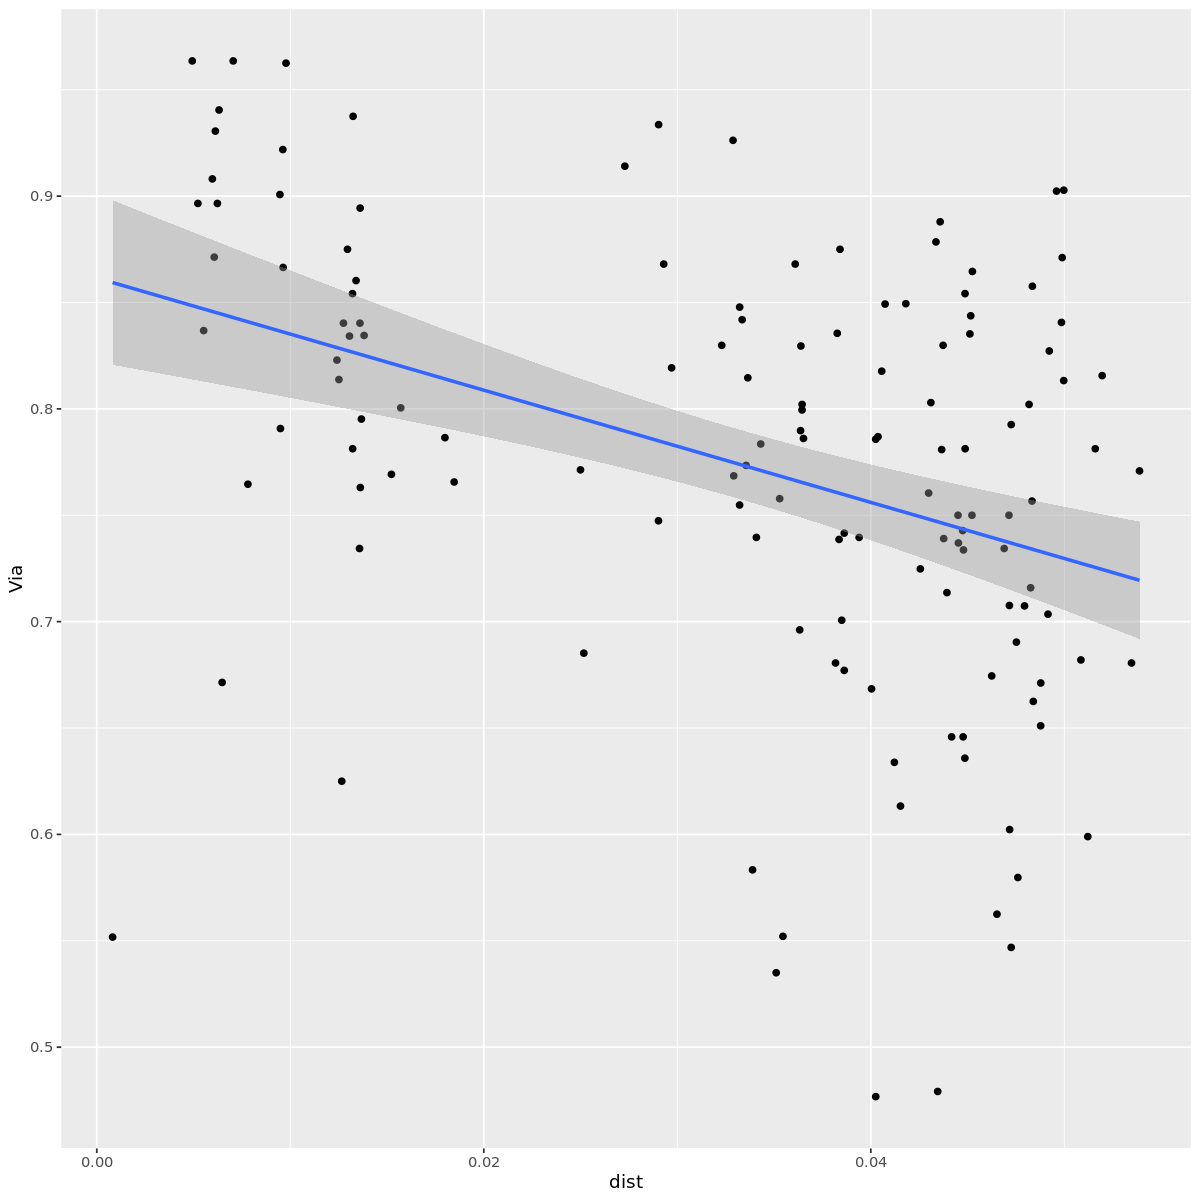

In [19]:
ggplot(data, aes(dist, Via))+
geom_point()+
geom_smooth(method="lm")

In [20]:
head(data)

,V1,Cross,Via,ID1,ID2,ID1_Std,ID2_Std,dist
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,A1,0.8355263,YJS7200,YJS7105,ATE,ANG,0.038266
2,2,B1,0.9262295,YJS7200,YJS7109,ATE,BKL,0.032879
3,3,B2,0.8298611,YJS7205,YJS7109,ANG,BKL,0.043735
4,4,C1,0.7415966,YJS7200,YJS7111,ATE,CGD,0.038627
5,5,C2,0.6903670,YJS7205,YJS7111,ANG,CGD,0.047523
6,6,C3,0.8342105,YJS7209,YJS7111,BKL,CGD,0.013060


In [21]:
head(my_crosses)

Cross ID,Short name 1,Short name 2,Colonies in pool
<chr>,<chr>,<chr>,<dbl>
YJNRC1,BAK,BET,1536
YJNRC2,BAN,BTI,1913
YJNRC3,AKH,BQC,1873
YJNRC4,ABS,BEF,1107
YJNRC5,BAK,BMK,2086
YJNRC6,BAN,CRB,1493


In [22]:
my_crosses$viability=NA
my_crosses$distance=NA
for(i in 1:nrow(my_crosses)){
    data_row=which((data$ID1_Std==my_crosses$`Short name 1`[i] & data$ID2_Std == my_crosses$`Short name 2`[i])|
                   (data$ID2_Std==my_crosses$`Short name 1`[i] & data$ID1_Std == my_crosses$`Short name 2`[i]))
    
    if(length(data_row)==0){
        next
    }
    my_crosses$viability[i]=data$Via[data_row]
    
}

In [23]:
head(comparisons)
for(i in 1:nrow(my_crosses)){
    data_row=which((comparisons$ID1_Std==my_crosses$`Short name 1`[i] & comparisons$ID2_Std == my_crosses$`Short name 2`[i])|
                   (comparisons$ID2_Std==my_crosses$`Short name 1`[i] & comparisons$ID1_Std == my_crosses$`Short name 2`[i]))
     if(length(data_row)==0){
        next
    }
    my_crosses$distance[i]=comparisons$dist[data_row][1]
}

,ID1_Std,ID2_Std,dist
,<chr>,<chr>,<dbl>
1,AAA,AAA,0.000000
2,AAB,AAA,0.014987
3,AAC,AAA,0.026482
4,AAD,AAA,0.048572
5,AAE,AAA,0.010528
6,AAG,AAA,0.034710


In [24]:
fwrite(my_crosses, "~/data/trd/crosses_info.csv")
my_crosses

Cross ID,Short name 1,Short name 2,Colonies in pool,viability,distance
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
YJNRC1,BAK,BET,1536,NA,0.047700
YJNRC2,BAN,BTI,1913,NA,0.037151
YJNRC3,AKH,BQC,1873,NA,0.050212
YJNRC4,ABS,BEF,1107,NA,0.048522
YJNRC5,BAK,BMK,2086,NA,0.047953
YJNRC6,BAN,CRB,1493,NA,0.047348
YJNRC7,AMM,BKL,2629,NA,0.046791
YJNRC8,ABE,ABL,1299,NA,0.045746
YJNRC9,BFC,CCF,589,NA,0.045163
